# **EDA on titanic dataset**

Loading and observing the data of titanic dataset

Dataset link: [Titanic_dataset_kaggle](https://www.kaggle.com/competitions/titanic)

In [27]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data

titanic = pd.read_csv("./datasets/titanic_train.csv")

In [3]:
# observing the columns

titanic.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
# unique values of each column

titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

What does each column says
* **PassengerId**: id of the passenger
* **Survived**: Wether passenger is survived or not (1/0)
* **Pclass**: Travelling class of passenger (1/2/3)
* **Name**: name of the passenger
* **Sex**: gender of the passenger
* **Age**: age of the passenger
* **Sisb**: how many related members travelling with that passenger (count)
* **Parch**: how many parents or childs travelling with that passenger (count)
* **Ticket**: ticket number
* **Fare**: what is the cost of ticket
* **cabin**: in which cabin does the customer travells
* **Embarked**: From which station does this titanic starts travelling (S/C/QT)

In [5]:
# first few rows of the data

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# shape of the data

print(f"Number of rows in the dataset: {titanic.shape[0]}")
print(f"Number of columns in the dataset: {titanic.shape[1]}")

Number of rows in the dataset: 891
Number of columns in the dataset: 12


In [7]:
# avaiable columns and their datatypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Broadly, the column types are


*   **Numerical** - Age, Fare, PassengerId
*   **Categorical** - survived, Pclass, Sex, SibSp, Parch, Embarked
*   **Mixed** - Name, Ticket, Cabin



## **Univariate Analysis**

We can observe that, **passengerId** wont play much role in the analysis, so we can neglect it.

### **Age**

In [8]:
# datatype of age

titanic["Age"].dtype

dtype('float64')

In [9]:
# univariate analysis on Age
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

we can observe that
* max age is : 80
* min age is : 0.42

so there may be no any otliers or wrong data points

Also 75% of peoples age is <= 38 (so most of people were not old)

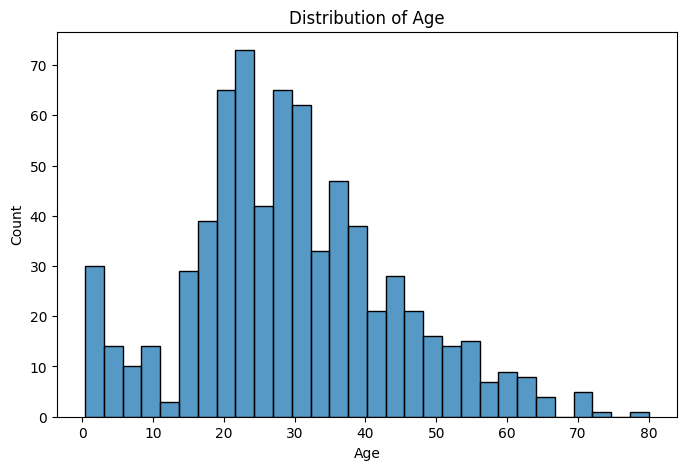

In [10]:
# plotting for more better results

plt.figure(figsize=(8, 5))
sns.histplot(
    data=titanic,
    x='Age',
    bins=30,
    kde=False
)

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

We can observe that, most of the people are in age b/w 20 & 30

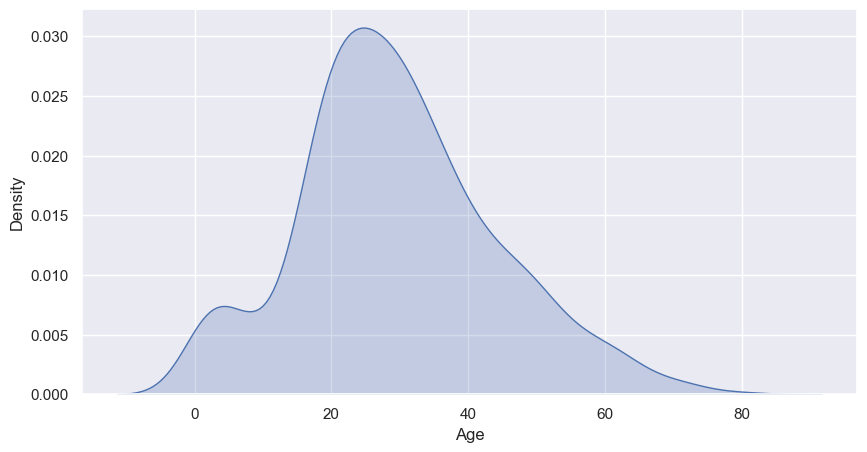

In [11]:
# kde distrubution of age

sns.set_theme(style = "darkgrid")
plt.figure(figsize=(10,5))
sns.kdeplot(titanic['Age'], fill = True)
plt.show()

In [12]:
# observing the skewness also

print(f"skewness of age is : {titanic['Age'].skew()}")

skewness of age is : 0.38910778230082704


skewness of age is nearly to 0, so roughly it follows normal distribution


*   if skewness is +ve -- positively skewed data
*   if skewness is -ve -- negatively skewed data



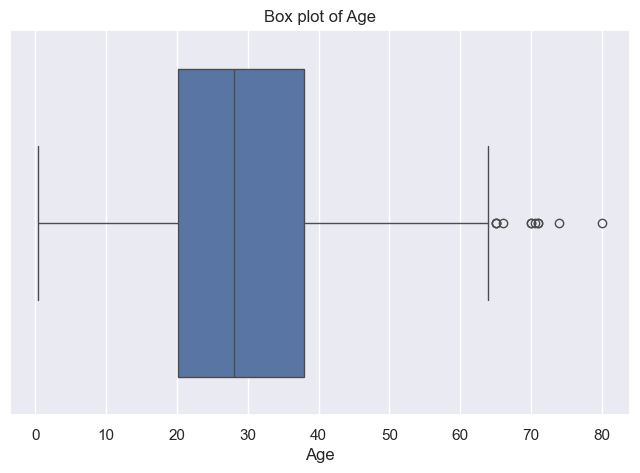

In [13]:
# observing the outliers of age column using blox plot

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=titanic,
    x='Age'
)

plt.title("Box plot of Age")
plt.xlabel("Age")

plt.show()

A few outliers were present, but we need to decide to accept or reject these outliers

Above box plot gives that, above 65 aged people are outliers

In [14]:
# observing the outliers data

titanic[titanic['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


from the outlier age values we can decide to reject or accept those datapoints

In [15]:
# finding the null values of age column

print(f"number of null values in age column is : {titanic['Age'].isnull().sum()}")
print(f"percentage of null values in age column : {round(titanic['Age'].isnull().sum()/len(titanic['Age'])*100, 2)}%")

number of null values in age column is : 177
percentage of null values in age column : 19.87%


there are 177 missing values existed in the age column

**Conclusions on Age**



*   Age is normally(almost) distributed
*   19.8% of the values are missing
*   There are some outliers, but can be cosiderable.



### **Fare**

In [16]:
# datatype of Fare

titanic['Fare'].dtype

dtype('float64')

In [17]:
# describing the age

titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

we can observe that
* max fare is : 512.32
* min fare is : 0.00

so there may be no any otliers or wrong data points

Also 75% of peoples fare is <= 31 (so few people are travelling with high fare)

In [18]:
# distribution of fare

print(f"skewness of fare is : {titanic['Fare'].skew()}")

skewness of fare is : 4.787316519674893


Skewness is very high and +ve

So fare is positively skewed data

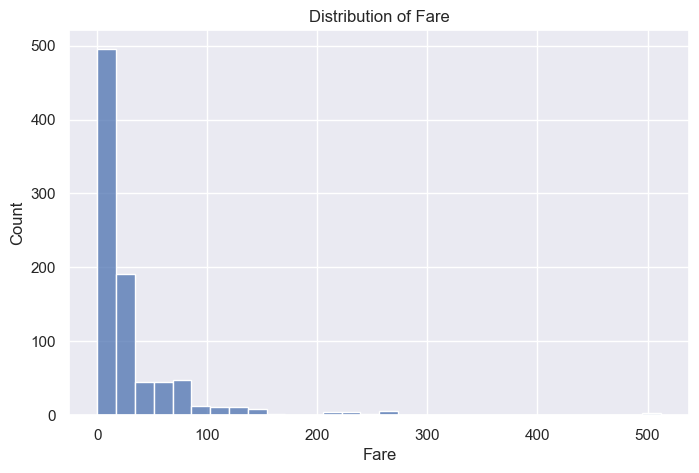

In [19]:
# histplot of fare

plt.figure(figsize=(8, 5))
sns.histplot(
    data=titanic,
    x='Fare',
    bins=30,
    kde=False
)

plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")

plt.show()

data is highly positively skewed

If the data is correct, we can conclude that, most of the people travelled with low fare

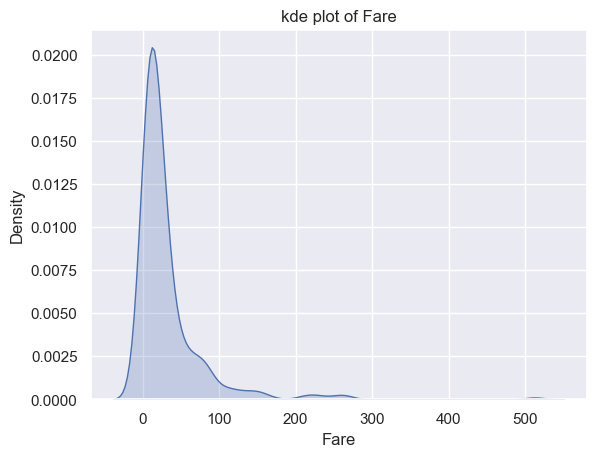

In [20]:
# kde plot of fare

sns.kdeplot(titanic['Fare'], fill = True)
plt.title("kde plot of Fare")
plt.show()

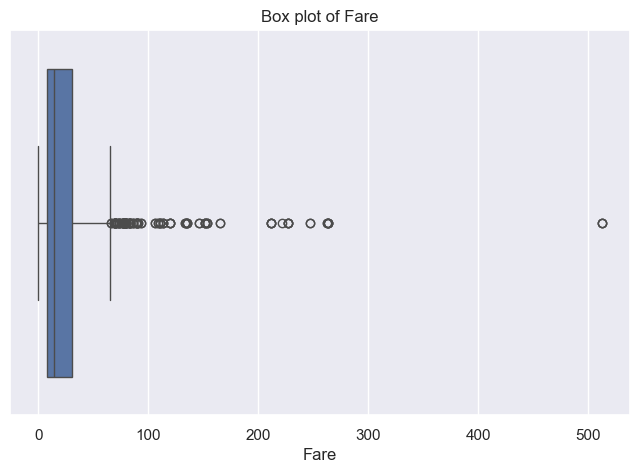

In [21]:
# observing the outliers

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=titanic,
    x='Fare'
)

plt.title("Box plot of Fare")
plt.xlabel("Fare")
plt.show()

In [22]:
# upper fare is 65, so remaining are considered as outliers

titanic[titanic['Fare']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [23]:
titanic[titanic['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


we can observe that, fare same and also the ticket also same for the three rows

From this we can coclude that
* This dataset rows doesn't describe individual fare data
* The rows actually describes the group fare data (family members)

116 rows are cosidered as outliers

In [24]:
# observing the null values of the fare column

print(f"number of null values in fare column is : {titanic['Fare'].isnull().sum()}")
print(f"percentage of null values in fare column : {round(titanic['Fare'].isnull().sum()/len(titanic['Fare'])*100, 2)}%")

number of null values in fare column is : 0
percentage of null values in fare column : 0.0%


**Conclusions**


*   Fare data is +vely skewed
*   There are no missing values in the fare data
*   there are 116 rows outliers in the fare data
*   fare column actually contains the group fares, but not individual fares (This might be an issue)
*   We need to create a new col called individual fare



### **Survived**

In [25]:
# frequency distribution of survived columns

titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data is slightly imbalanced, but its ok

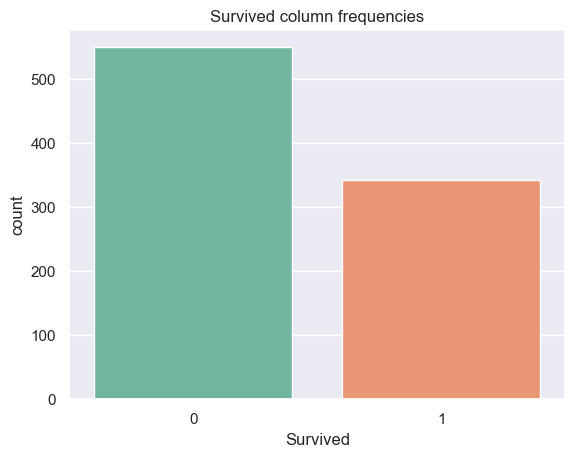

In [28]:
# bar chart of survived column

sns.countplot(data=titanic, x='Survived', palette='Set2')
plt.title("Survived column frequencies")
plt.show()

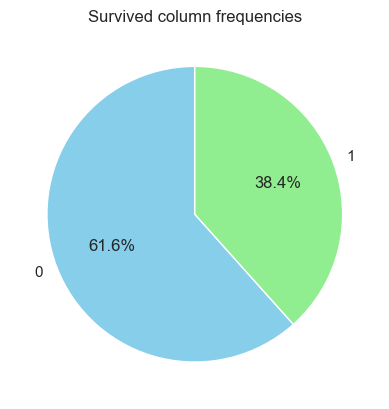

In [29]:
# pie chart

titanic['Survived'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen']
)

plt.title("Survived column frequencies")
plt.ylabel('')
plt.show()

we can observe that, percentages are 38.4% for survived = 1 and 61.6% for survived = 0

So many people wer died and few few people were survived

In [30]:
# missing vlues and threir percentages in the survived column

print(f"number of null values in survived column is : {titanic['Survived'].isnull().sum()}")
print(f"percentage of null values in survived column : {round(titanic['Survived'].isnull().sum()/len(titanic['Survived'])*100, 2)}%")

number of null values in survived column is : 0
percentage of null values in survived column : 0.0%


**conclusion**

* The dataset is somewhat balanced
* But analytically we can say, more people were not survived.

### **Pclass**

In [31]:
# frequency distribution of plcass

titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

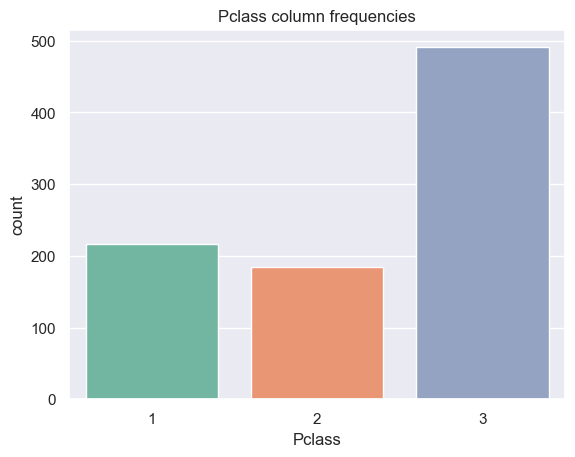

In [32]:
# frequency distribution visualization

sns.countplot(data=titanic, x='Pclass', palette='Set2')
plt.title("Pclass column frequencies")
plt.show()

Most of the people were from 3rd class

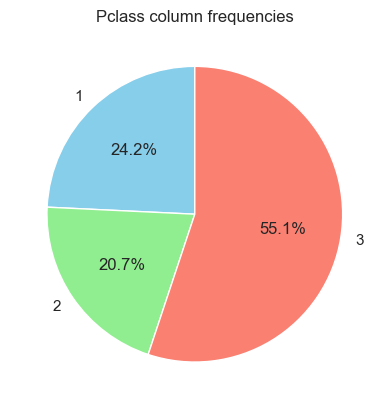

In [33]:
# pie chart for percetage of frequency distributions

titanic['Pclass'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'salmon']
)

plt.title("Pclass column frequencies")
plt.ylabel('')
plt.show()

In [34]:
# null values count of pclass

print(f"number of null values in pclass column is : {titanic['Pclass'].isnull().sum()}")
print(f"percentage of null values in pclass column : {round(titanic['Pclass'].isnull().sum()/len(titanic['Pclass'])*100, 2)}%")

number of null values in pclass column is : 0
percentage of null values in pclass column : 0.0%


**Conclusion**
* There are 3 classes of people
* Most people were from 3rd class
* There are no null values in the pclass column
* also when compared, less people travelled in pclass 2 compared to pclass 3

### **sex**

In [35]:
# frequencies distribution of gender

titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Travelling males are more, when compared to females

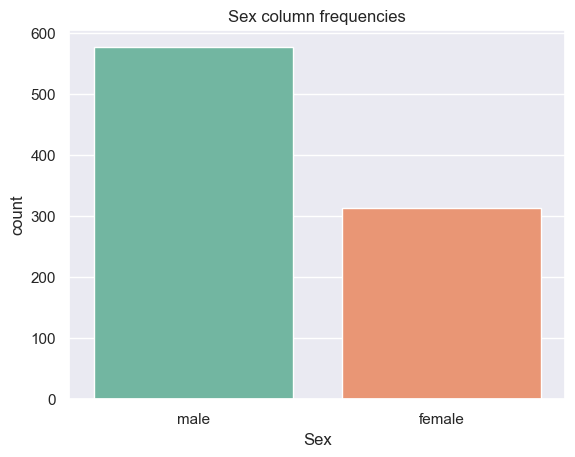

In [36]:
# bar chart

sns.countplot(data=titanic, x='Sex', palette='Set2')
plt.title("Sex column frequencies")
plt.show()

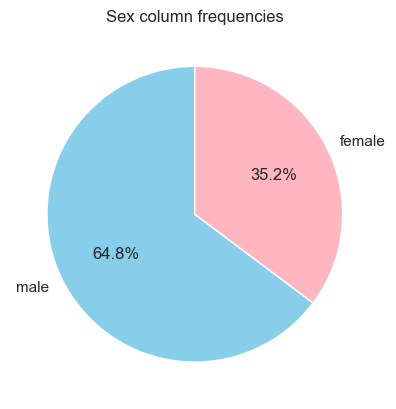

In [37]:
# pie chart

titanic['Sex'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightpink']
)

plt.title("Sex column frequencies")
plt.ylabel('')
plt.show()

In [38]:
# count of null vlaues if any

print(f"number of null values in sex column is : {titanic['Sex'].isnull().sum()}")
print(f"percentage of null values in sex column : {round(titanic['Sex'].isnull().sum()/len(titanic['Sex'])*100, 2)}%")

number of null values in sex column is : 0
percentage of null values in sex column : 0.0%


**conclusion**
* more males are travelling, when compared to females

### **sibsp**

In [40]:
 # distribution of sibsp

titanic['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

There are more people who were travelling individually

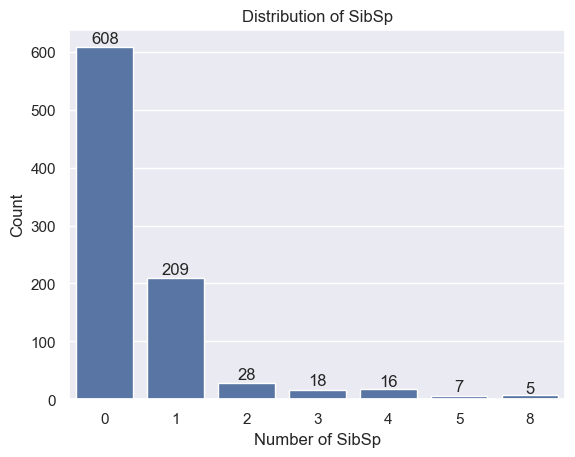

In [41]:
# bar chart

sibsp_counts = titanic['SibSp'].value_counts()

sns.set_theme(style="darkgrid")
ax = sns.barplot(x=sibsp_counts.index, y=sibsp_counts.values)

# Add counts on top of each bar
for i, count in enumerate(sibsp_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.title("Distribution of SibSp")
plt.xlabel("Number of SibSp")
plt.ylabel("Count")
plt.show()


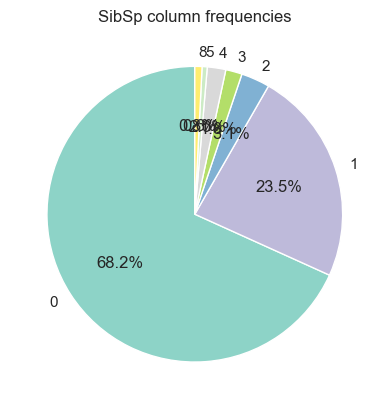

In [42]:
# pie chart

titanic['SibSp'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3'
)

plt.title("SibSp column frequencies")
plt.ylabel('')
plt.show()

In [43]:
# null value counts

print(f"number of null values in sibsp column is : {titanic['SibSp'].isnull().sum()}")
print(f"percentage of null values in sibsp column : {round(titanic['SibSp'].isnull().sum()/len(titanic['SibSp'])*100, 2)}%")

number of null values in sibsp column is : 0
percentage of null values in sibsp column : 0.0%


**conclusion**
* There are no null values in this sbsp
* More that half of the people travelling singly

### **Parch**

In [44]:
## Parch distribution

titanic['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Most people were travelling solo

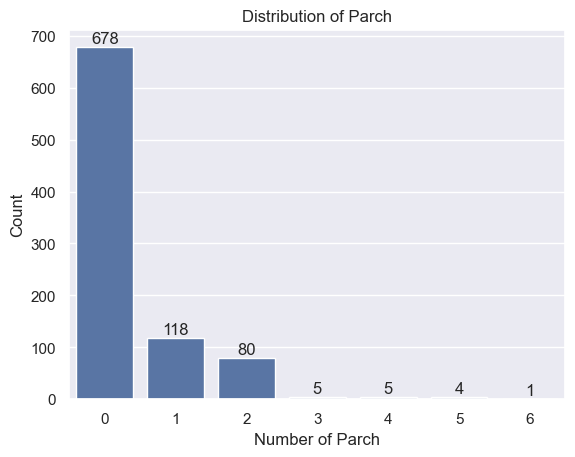

In [45]:
# bar chart

parch_counts = titanic['Parch'].value_counts()

sns.set_theme(style="darkgrid")
ax = sns.barplot(x=parch_counts.index, y=parch_counts.values)

# Add counts on top of each bar
for i, count in enumerate(parch_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.title("Distribution of Parch")
plt.xlabel("Number of Parch")
plt.ylabel("Count")
plt.show()



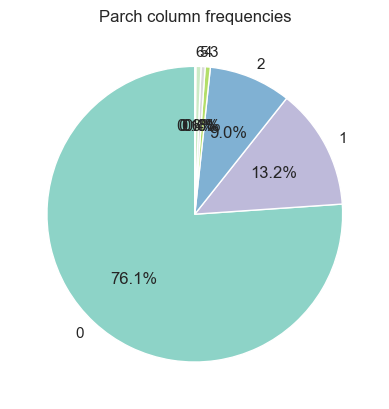

In [46]:
# pie chart

titanic['Parch'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3'
)

plt.title("Parch column frequencies")
plt.ylabel('')
plt.show()

In [47]:
# counting of null values

print(f"number of null values in parch column is : {titanic['Parch'].isnull().sum()}")
print(f"percentage of null values in parch column : {round(titanic['Parch'].isnull().sum()/len(titanic['Parch'])*100, 2)}%")

number of null values in parch column is : 0
percentage of null values in parch column : 0.0%


**conclusion**

* More people were travelling solo
* There are no null values
* Parch and Sibsp cols can be merged to form a new col called family size
* We can also create a new column called "is alone" (because alone people has more chances to survive than the person who contain family members)

### **Embarked**

In [48]:
# frequency disribution

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Most frequent source passangers were from "s"

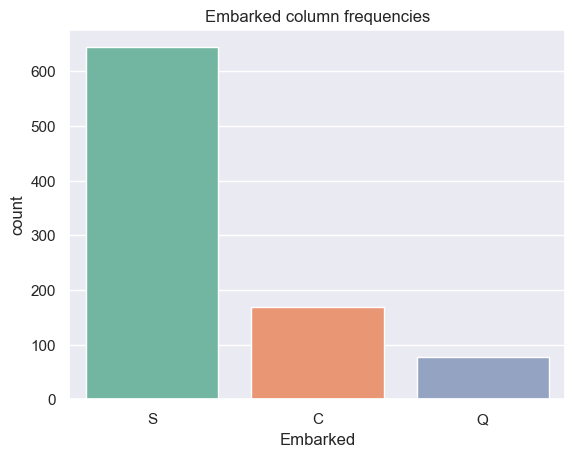

In [49]:
# bar chart

sns.countplot(data=titanic, x='Embarked', palette='Set2')
plt.title("Embarked column frequencies")
plt.show()

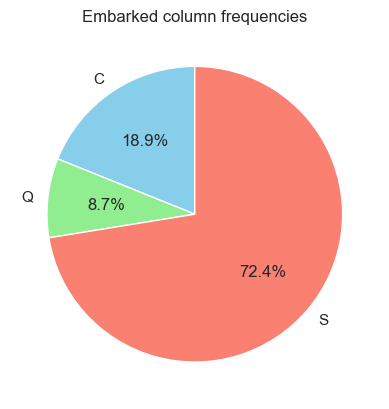

In [50]:
# pie chart

titanic['Embarked'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'salmon']
)

plt.title("Embarked column frequencies")
plt.ylabel('')
plt.show()

In [51]:
# null values

print(f"number of null values in embarked column is : {titanic['Embarked'].isnull().sum()}")
print(f"percentage of null values in embarked column : {round(titanic['Embarked'].isnull().sum()/len(titanic['Embarked'])*100, 2)}%")

number of null values in embarked column is : 2
percentage of null values in embarked column : 0.22%


Two missing values were present

In [52]:
# seeing those missing valued rows of embarked column

titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Conclusion**
* Most of the people were started from "S"
* There were 2 null values exists in this "embarked" column

### Mixed columns (Name, Ticket, cabin)


Need to feature engineer the mized columns to get more insights

## **Bivariate Analysis**

### Possibilities of selcted two columns

* Numerical - Numerical (NN)

* Numerical - Categorical (NC)

* Categorical - Categorical (CC)



### **Suvived - Pclass (CC)**



**how many people survived and died based on each class**

In [53]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [54]:
# we can all do it by using contingency table

pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [55]:
# observing the same thing in form of percentage

pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253




*   Pclass 1: 37% died, 63% survived
*   Pclass 2: 52% died, 47% survived
*   Pclass 3: 75% died, 24% survived



We can observe that comparatively 1st class people were survived more than 3rd class people

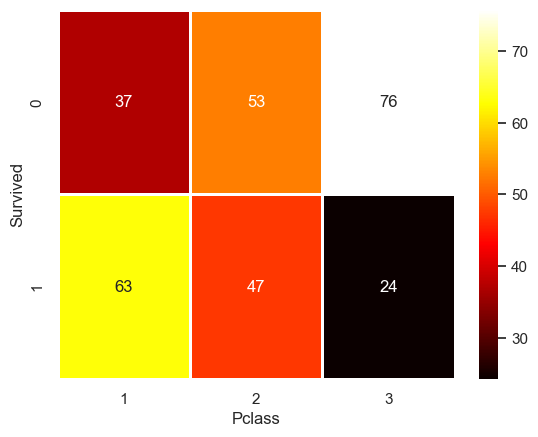

In [56]:
# visualizing the above data in a heatmap

data = pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'columns')*100
sns.heatmap(data, annot = True, linewidths=2, cmap = 'hot')
plt.show()

### **Survived - Sex**

Survived people based on gender

In [57]:
titanic.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [58]:
# using contingency table

pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [59]:
# using contingency table with normalization

pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


Observed data
*  female - 25% died, 75% survived
*  Male - 81% died, 19% survived

From this we can say that "females were prioritized for saving first"

### **Survived - Embarked**

In [60]:
# contingency table

pd.crosstab(titanic['Survived'], titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [61]:
# contingency table with normalization

pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


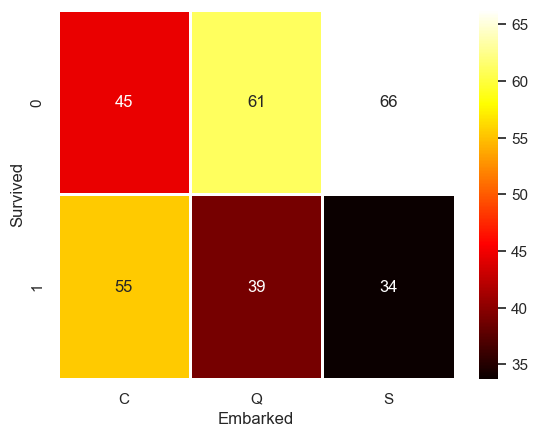

In [62]:
# vusualizing the data

data = pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')*100
sns.heatmap(data, annot = True, linewidths=2, cmap = 'hot')
plt.show()

from above data
* C -- 45% died, 55% survived
* Q -- 61% died, 39% survived
* S -- 66% died, 34% survived

in "C" more members were survived

There may be many reasons for that
* May be females were more from "C"
* May be "C" cotains more 1st class people

In [63]:
# checking the assumptions

# May be females were more from "C"

pd.crosstab(titanic['Sex'], titanic['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


"C" and "Q" has similar percentage of gender distribution

So the assumption "females were more from C" is wrong

In [64]:
# May be C contains first class people

pd.crosstab(titanic['Pclass'], titanic['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


Yes

From C more people are 1st class

### **Survived - Age**

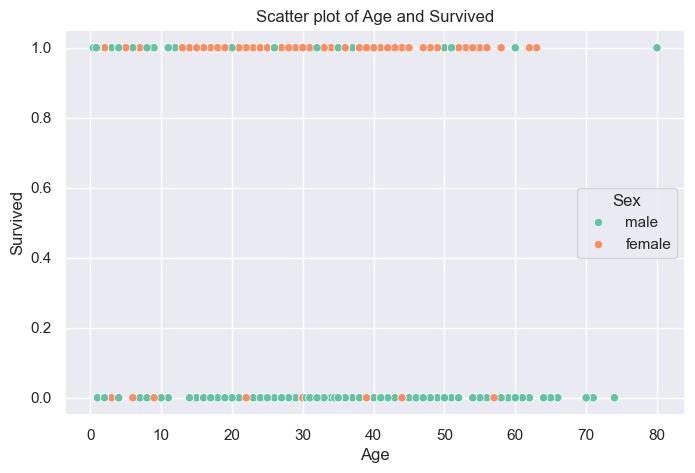

In [66]:
# scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=titanic, x='Age', y='Survived', hue='Sex', palette='Set2')
plt.title("Scatter plot of Age and Survived")
plt.show()

There are mixed ages of people whio were survived and not survived

But we can observe that, max females were survived

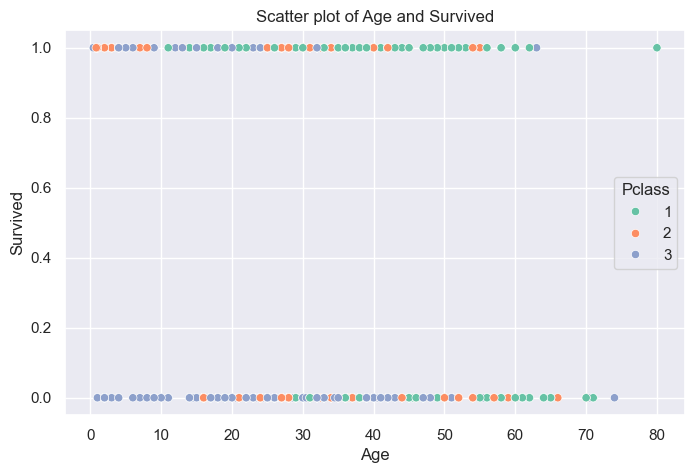

In [67]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=titanic, x='Age', y='Survived', hue='Pclass', palette='Set2')
plt.title("Scatter plot of Age and Survived")
plt.show()

we can observe that, max 1st class people were survived

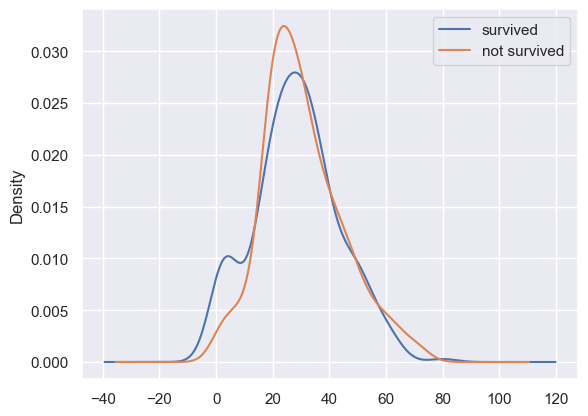

In [68]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind = 'kde', label = 'survived')
titanic[titanic['Survived'] == 0]['Age'].plot(kind = 'kde', label = 'not survived')
plt.legend()
plt.show()

* people aged b/w 0 to 10, have higher chances of surviving that death
* people aged b/w 10 to 30 has more chance of death than survival
* people who survived in p1, has mean age b/w 30 to 40
* people aged b/w 60 to 80 has more chances of death than surviving

In [69]:
# proving statement 3
titanic[titanic['Pclass'] == 1]['Age'].mean()

np.float64(38.233440860215055)

## **Feature engeneering**

### **Fare** column

It tells about the grouped fares rather than individual fares

so need to modify that column

In [70]:
titanic[titanic['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
